# 3b. Merging Train and Spray

This notebook will display the historical spray locations along with the locations of the traps for the years that we have spray data 2011 and 2013

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Load the necessary data

In [2]:
df_train = pd.read_csv('../data/clean_train_df.csv')
df_spray = pd.read_csv('../data/cleaned_spray.csv')
df_weather = pd.read_csv('../data/clean_weather_df_NP.csv')

#### Turn Spray and Train into timeseries dataframes

Doing this to ensure ease of use when wanting to filter by the date

In [3]:
df_train.head()

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,year,month,day
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",culex pipiens/restuans,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007,5,29
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",culex restuans,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007,5,29
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",culex restuans,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,2007,5,29
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",culex pipiens/restuans,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,2007,5,29
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",culex restuans,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,2007,5,29


In [4]:
df_train['date'] = pd.to_datetime(df_train['date'])

In [5]:
df_train.set_index('date', inplace=True)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10506 entries, 2007-05-29 to 2013-09-26
Data columns (total 14 columns):
address                   10506 non-null object
species                   10506 non-null object
block                     10506 non-null int64
street                    10506 non-null object
trap                      10506 non-null object
addressnumberandstreet    10506 non-null object
latitude                  10506 non-null float64
longitude                 10506 non-null float64
addressaccuracy           10506 non-null int64
nummosquitos              10506 non-null int64
wnvpresent                10506 non-null int64
year                      10506 non-null int64
month                     10506 non-null int64
day                       10506 non-null int64
dtypes: float64(2), int64(7), object(5)
memory usage: 1.2+ MB


In [7]:
df_spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14251 entries, 0 to 14250
Data columns (total 4 columns):
date         14251 non-null object
time         14251 non-null object
latitude     14251 non-null float64
longitude    14251 non-null float64
dtypes: float64(2), object(2)
memory usage: 445.4+ KB


In [8]:
df_spray['date'] = pd.to_datetime(df_spray['date'])

In [9]:
df_spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14251 entries, 0 to 14250
Data columns (total 4 columns):
date         14251 non-null datetime64[ns]
time         14251 non-null object
latitude     14251 non-null float64
longitude    14251 non-null float64
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 445.4+ KB


In [10]:
df_spray.set_index('date', inplace=True)

In [11]:
df_spray.head()

,time,latitude,longitude
date,,,
2011-08-29,6:56:58 PM,42.391623,-88.089163
2011-08-29,6:57:08 PM,42.391348,-88.089163
2011-08-29,6:57:18 PM,42.391022,-88.089157
2011-08-29,6:57:28 PM,42.390637,-88.089158
2011-08-29,6:57:38 PM,42.390410,-88.088858


#### Exploratory analysis on the Spray vs Train data

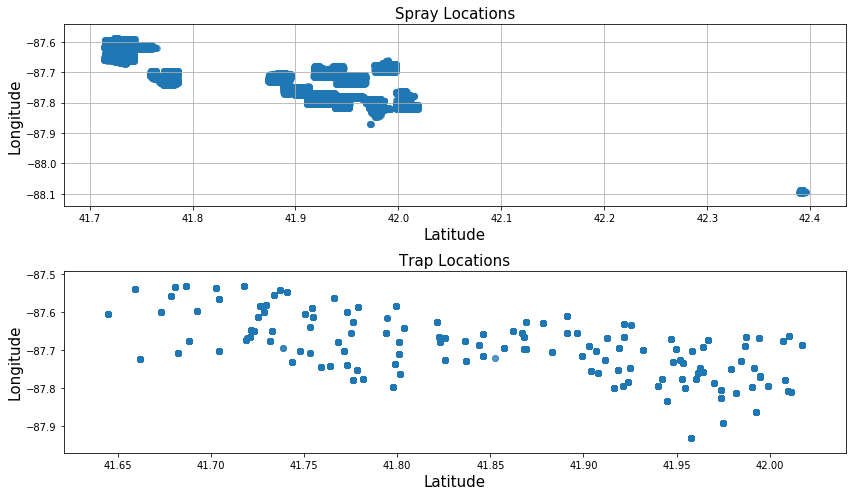

In [12]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12,7))
ax[0].scatter(df_spray['latitude'], df_spray['longitude'], alpha=0.5)
ax[1].scatter(df_train['latitude'], df_train['longitude'], alpha=0.5)

ax[0].set_xlabel('Latitude', fontsize=15)
ax[0].set_ylabel('Longitude', fontsize=15)
ax[0].set_title('Spray Locations', fontsize=15)

ax[1].set_xlabel('Latitude', fontsize=15)
ax[1].set_ylabel('Longitude', fontsize=15)
ax[1].set_title('Trap Locations', fontsize=15)

ax[0].grid(True)
fig.tight_layout()

plt.show()

#### Visualizing the Spray and Traps together

In [13]:
df_train13 = df_train['2013']

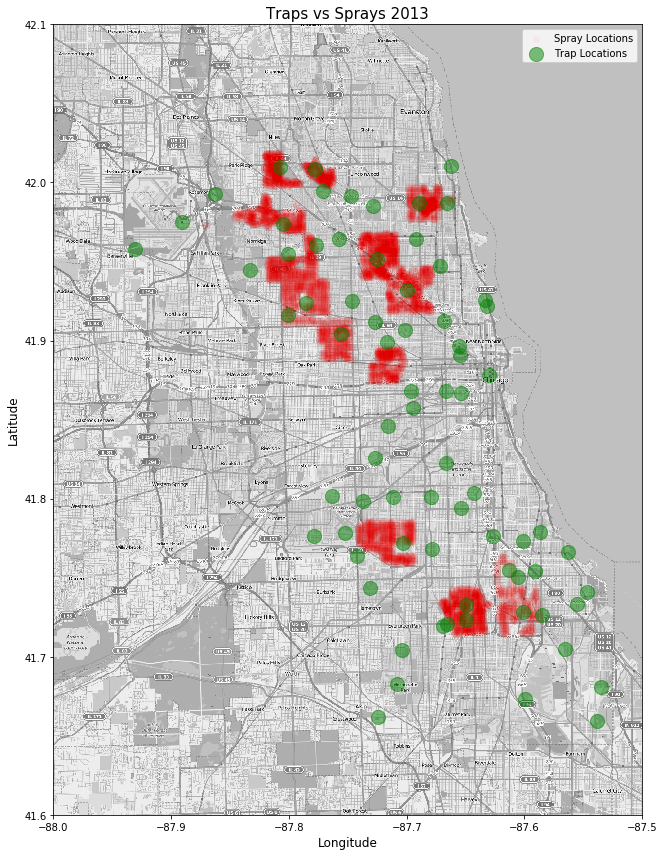

In [14]:
mapdata = np.loadtxt("../resources/mapdata_copyright_openstreetmap_contributors.txt")
traps = df_train13[['trap','longitude', 'latitude', 'wnvpresent']]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(16,12)
plt.title('Traps vs Sprays 2013', fontsize=15)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

plt.imshow(mapdata,
          cmap=plt.get_cmap('gray'),
          extent=lon_lat_box,
          aspect=aspect)

spray_df = df_spray[df_spray['longitude']>-88]
locations = traps[['longitude', 'latitude']].drop_duplicates().values
sprays = spray_df[['longitude', 'latitude']].drop_duplicates().values
plt.scatter(sprays[:,0], sprays[:,1], c='r', alpha=.03)
plt.scatter(locations[:,0], locations[:,1], color='g', s=200, alpha=.5)
plt.legend(['Spray Locations', 'Trap Locations'])

plt.tight_layout()
plt.savefig('../plots/traps_sprays.png')